In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
AH_data = pd.read_csv('Downloads\_d21b2085472fd467f689f21cd421b13b_tree_addhealth.csv')
data_clean = AH_data.dropna()

data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [4]:
data_features = ['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']
predictors = data_clean[data_features]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)
pred_test.shape,pred_train.shape

((1830, 24), (2745, 24))

In [5]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

In [6]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1440,   82],
       [ 190,  118]], dtype=int64)

In [7]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8513661202185793

In [8]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
feature_importance = dict(zip(data_features,model.feature_importances_))

In [9]:
sort_feature_importance = sorted(feature_importance.items(),key=lambda k:k[1], reverse=True)
sort_feature_importance[:20]

[('marever1', 0.12901455230264258),
 ('GPA1', 0.0708531040543679),
 ('DEVIANT1', 0.06800298885156905),
 ('age', 0.06103440486424613),
 ('DEP1', 0.058912574614759225),
 ('FAMCONCT', 0.05755831052193833),
 ('SCHCONN1', 0.056336648520055634),
 ('PARACTV', 0.055903585120700566),
 ('ESTEEM1', 0.055327775971192344),
 ('ALCEVR1', 0.04881483851523905),
 ('PARPRES', 0.04846554231636529),
 ('ALCPROBS1', 0.04780870988559962),
 ('VIOL1', 0.04681525450018082),
 ('cigavail', 0.027267667550879282),
 ('BIO_SEX', 0.024728843471946736),
 ('WHITE', 0.023740909145164368),
 ('cocever1', 0.021663731798301267),
 ('BLACK', 0.019894634384087066),
 ('inhever1', 0.01853296093808437),
 ('PASSIST', 0.01819524736250114)]

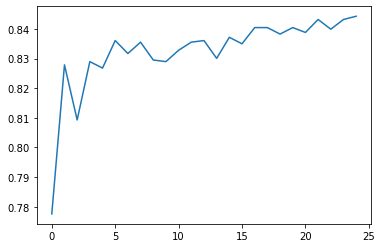

In [10]:
%matplotlib inline
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier = RandomForestClassifier(n_estimators=idx + 1,random_state=1000)
   classifier=classifier.fit(pred_train,tar_train)
   predictions =classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)

In [11]:
accuracy.max(),np.where(accuracy==accuracy.max())

(0.8442622950819673, (array([24], dtype=int64),))